# Testing code for GIRAFFE!

## Feel free to play with it. There are some plots already done, but you can add the ones you want following the outputs available in the 'res' variable.

## Some of the results can be compared with the actual ESO ETC outputs. Keep in mind that you must compared with the low-resolusion mode (setup LR01). The link is the following:
## https://www.eso.org/observing/etc/bin/gen/form?INS.NAME=GIRAFFE+INS.MODE=spectro

In [14]:
import matplotlib
from mpdaf.obj import mag2flux, flux2mag
from matplotlib import pyplot as plt
import numpy as np
from astropy.table import Table
matplotlib.rcParams.update({'font.size': 20})
import warnings
warnings.filterwarnings("ignore")

from numpy.testing import assert_almost_equal, assert_allclose
import astropy.units as u

In [15]:
from pyetc.wst import WST
from pyetc.vlt import VLT
from pyetc.etc import show_noise, get_seeing_fwhm

# Info for the GIRAFFE MOS channel blue!

In [3]:
etc = VLT(log='INFO')
etc.info()

[INFO] VLT ETC version: 0.3
[INFO] Diameter: 8.20 m Area: 48.5 m2
[INFO] IFS type IFS Channel blue
[INFO] 	 BlueMUSE 5/01/2022
[INFO] 	 version 1.0
[INFO] 	 Obscuration 0.000
[INFO] 	 Spaxel size: 0.20 arcsec Image Quality tel+ins fwhm: 0.10 arcsec beta: 2.50 
[INFO] 	 Wavelength range [3500. 5800.] A step 0.57 A LSF 2.0 pix Npix 4001
[INFO] 	 Instrument transmission peak 0.45 at 4712 - min 0.31 at 3500
[INFO] 	 Detector RON 3.0 e- Dark 3.0 e-/h
[INFO] IFS type IFS Channel red
[INFO] 	 MUSE 5/01/2022
[INFO] 	 version 1.0
[INFO] 	 Obscuration 0.000
[INFO] 	 Spaxel size: 0.20 arcsec Image Quality tel+ins fwhm: 0.10 arcsec beta: 2.50 
[INFO] 	 Wavelength range [4800. 9300.] A step 1.25 A LSF 2.5 pix Npix 3601
[INFO] 	 Instrument transmission peak 0.34 at 6790 - min 0.13 at 9300
[INFO] 	 Detector RON 3.0 e- Dark 3.0 e-/h
[INFO] GIRAFFE type MOS Channel blue
[INFO] 	 Based on ESO ETC 17/01/2023
[INFO] 	 version 1.0
[INFO] 	 Obscuration 0.000
[INFO] 	 Spaxel size: 0.30 arcsec Image Quality t

Text(0.5, 1.0, 'GIRAFFE')

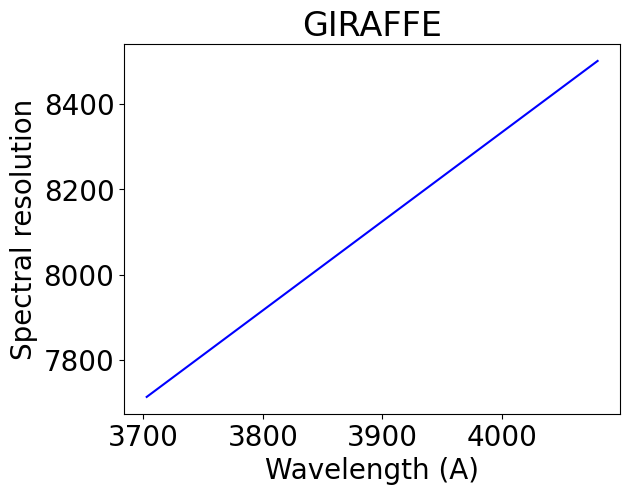

In [4]:
plt.plot(etc.giraffe['blue']['wave'].coord(), etc.get_spectral_resolution(etc.giraffe['blue']), color='b')

plt.xlabel('Wavelength (A)')
plt.ylabel('Spectral resolution')
plt.title('GIRAFFE')


Text(0.5, 1.0, 'GIRAFFE')

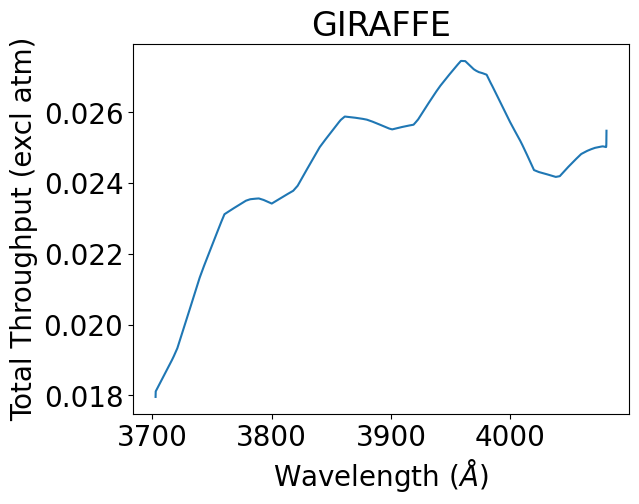

In [6]:
plt.plot(etc.giraffe['blue']['instrans'].wave.coord(), etc.giraffe['blue']['instrans'].data)

plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Total Throughput (excl atm)')
plt.title('GIRAFFE')


# Let's start with some examples...

## ima_type='ps'; spect_type='template'

In [7]:
def test_template_ps():
    
    mos = etc.giraffe['blue']    
    
    wave = 3850 # central wavelength A
    dspec = dict(type='template', name='kc96/starb1',redshift=0.5, wave_center=wave, wave_width=250)
    spec = etc.get_spec(mos, dspec)
    
    obs = dict(
        moon = 'darksky',
        seeing = 0.7,
        airmass = 1,
        ndit = 1, # number of exposures
        dit = 3600, # exposure time in sec of one exposure
        spec_type = 'cont',
        ima_type = 'ps', 
    )
    etc.set_obs(obs)
    mag   = 20
    flux  = mag2flux(mag, wave) #5.e-18    kfwhm_spec = etc.optimum_spectral_range(mos, flux, None, spec)
    res = etc.snr_from_source(mos, flux, None, spec)
    res1 = etc.snr_from_source(mos, flux, None, spec)
    
#    snr0 = res['aper']['snr']
#    res = etc.flux_from_source(mos, snr0, None, spec)
#    aper = res['aper']
#    assert_allclose(aper['snr'],snr0,rtol=0.01)
#    assert_allclose(aper['flux'],5.e-18,rtol=0.1) # 5.3e-18
    
    return res1

In [8]:
res = test_template_ps()
res


{'cube': {'trunc_spec': <Spectrum(shape=(3149,), unit='', dtype='float64')>},
 'input': {'atm_abs': <Spectrum(shape=(3149,), unit='', dtype='>f8')>,
  'ins_trans': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'atm_emi': <Spectrum(shape=(3149,), unit='', dtype='>f8')>,
  'flux_source': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'dl': 0.12,
  'flux': 7.343434810955498e-17,
  'moon': 'darksky',
  'dit': 3600,
  'ndit': 1,
  'airmass': 1,
  'spec_type': 'cont',
  'ima_type': 'ps'},
 'spec': {'snr': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'snr_mean': 2.3966996891832637,
  'snr_max': 2.8409261803996544,
  'snr_min': 0.6068031582707945,
  'snr_med': 2.4101573819807673,
  'nph_source': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'nph_sky': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'frac_ima': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'nb_spaxels': array([25, 25, 25, ..., 25, 25, 25]),
  'nb_voxels': array([25, 25, 25, ..

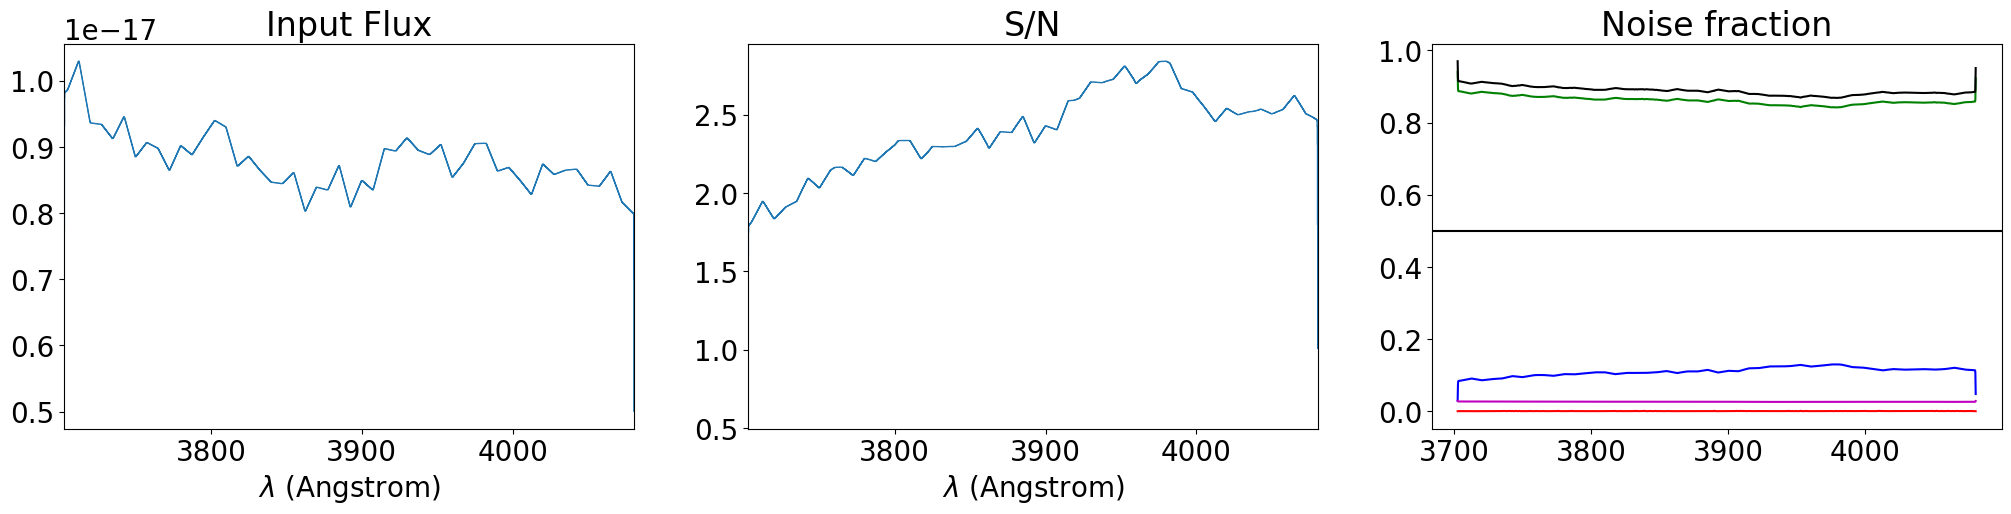

In [10]:
fig,ax = plt.subplots(1,3,figsize=(25,5))
res['input']['flux_source'].plot(ax=ax[0], title='Input Flux')
res['spec']['snr'].plot(ax=ax[1], title='S/N')
show_noise(res['spec']['noise'], ax=ax[2])

# ima_type='ps'; spect_type='line'

In [12]:
def test_line_ps():
    
    mos = etc.giraffe['blue']    
    
    wave = 3850 # central wavelength A
    dspec = dict(type='line', lbda=wave, sigma=2.0, skew=7.0)
    spec = etc.get_spec(mos, dspec)
    
    obs = dict(
        moon = 'darksky',
        seeing = 0.7,
        airmass = 1,
        ndit = 1, # number of exposures
        dit = 3600, # exposure time in sec of one exposure
        spec_type = 'line',
        spec_range_type = 'adaptative',
        spec_range_kfwhm = 1.5,
        ima_type = 'ps', 
        ima_aperture_type = 'circular_adaptative',
        ima_kfwhm = 7.4,
    )
    etc.set_obs(obs)
    flux = 5.e-18
    kfwhm_spec = etc.optimum_spectral_range(mos, flux, None, spec)
    kfwhm_ima = etc.optimum_circular_aperture(mos, flux, None, spec)
    res = etc.snr_from_source(mos, flux, None, spec)
    res1 = etc.snr_from_source(mos, flux, None, spec)
    
    snr0 = res['aper']['snr']
    res = etc.flux_from_source(mos, snr0, None, spec)
    aper = res['aper']
    assert_allclose(aper['snr'],snr0,rtol=0.01)
    assert_allclose(aper['flux'],5.e-18,rtol=0.1) # 5.3e-18
    
    return res1

In [16]:
res = test_line_ps()
res


{'cube': {'noise': {'ron': 4.0,
   'dark': 0.7071067811865476,
   'sky': <Spectrum(shape=(27,), unit='', dtype='float64')>,
   'source': <Cube(shape=(27, 5, 5), unit='', dtype='float64')>,
   'tot': <Cube(shape=(27, 5, 5), unit='', dtype='float64')>},
  'snr': <Cube(shape=(27, 5, 5), unit='', dtype='float64')>,
  'nph_source': <Cube(shape=(27, 5, 5), unit='', dtype='float64')>,
  'nph_sky': <Spectrum(shape=(27,), unit='', dtype='float64')>,
  'trunc_ima': <Image(shape=(5, 5), unit='', dtype='float64')>,
  'trunc_spec': <Spectrum(shape=(27,), unit='', dtype='float64')>},
 'input': {'flux_source': <Cube(shape=(27, 5, 5), unit='', dtype='float64')>,
  'atm_abs': <Spectrum(shape=(27,), unit='', dtype='>f8')>,
  'ins_trans': <Spectrum(shape=(27,), unit='', dtype='float64')>,
  'atm_emi': <Spectrum(shape=(27,), unit='', dtype='>f8')>,
  'dl': 0.12,
  'flux': 5e-18,
  'moon': 'darksky',
  'dit': 3600,
  'ndit': 1,
  'airmass': 1,
  'spec_type': 'line',
  'ima_type': 'ps',
  'spec_range_type':

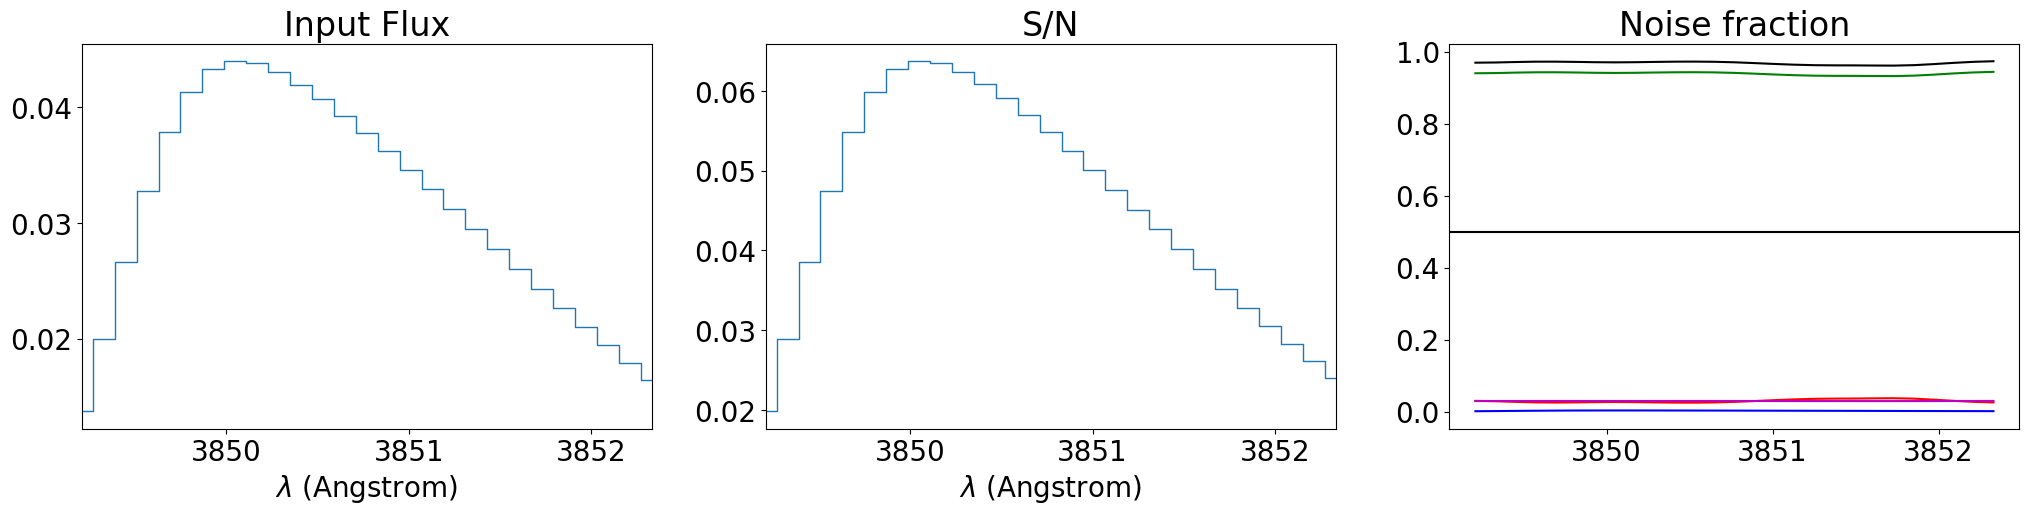

In [18]:
fig,ax = plt.subplots(1,3,figsize=(25,5))
res['cube']['trunc_spec'].plot(ax=ax[0], title='Input Flux')
res['spec']['snr'].plot(ax=ax[1], title='S/N')
show_noise(res['spec']['noise'], ax=ax[2])

# ima_type= 'ps'; spec_type='cont'

In [19]:
def test_cont_ps():
 
    mos = etc.giraffe['blue']
    
    wave,dw  = 3850,250
    dspec = dict(type='template', name='ref/sun', 
                 wave_center=wave, wave_width=dw)
    
    spec = etc.get_spec(mos, dspec)
     
    mag = 10
    flux = mag2flux(mag, wave)    
    
    obs = dict(
        moon = 'brightsky',
        seeing = 0.7,
        airmass = 1.0,
        ndit = 1, 
        dit = 3600, 
        spec_type = 'cont',
        ima_type = 'ps',
    )
    etc.set_obs(obs)
    
    
    frac_ima,size_ima,nspaxels = etc.get_psf_frac_ima(mos, flux, spec)
    assert size_ima.data[0] == size_ima.data[-1]
    assert frac_ima.data.max() < 1
    assert frac_ima.data.min() > 0
    assert nspaxels[0] == nspaxels[-1]
      
    res = etc.snr_from_source(mos, flux, None, spec)
    
    return res

In [20]:
res = test_cont_ps()
res

{'cube': {'trunc_spec': <Spectrum(shape=(3149,), unit='', dtype='float64')>},
 'input': {'atm_abs': <Spectrum(shape=(3149,), unit='', dtype='>f8')>,
  'ins_trans': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'atm_emi': <Spectrum(shape=(3149,), unit='', dtype='>f8')>,
  'flux_source': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'dl': 0.12,
  'flux': 7.343434810955438e-13,
  'moon': 'brightsky',
  'dit': 3600,
  'ndit': 1,
  'airmass': 1.0,
  'spec_type': 'cont',
  'ima_type': 'ps'},
 'spec': {'snr': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'snr_mean': 778.5622733015814,
  'snr_max': 1004.855725018761,
  'snr_min': 347.8624711281444,
  'snr_med': 733.2094223404697,
  'nph_source': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'nph_sky': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'frac_ima': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'nb_spaxels': array([25, 25, 25, ..., 25, 25, 25]),
  'nb_voxels': array([25, 25, 25, ..

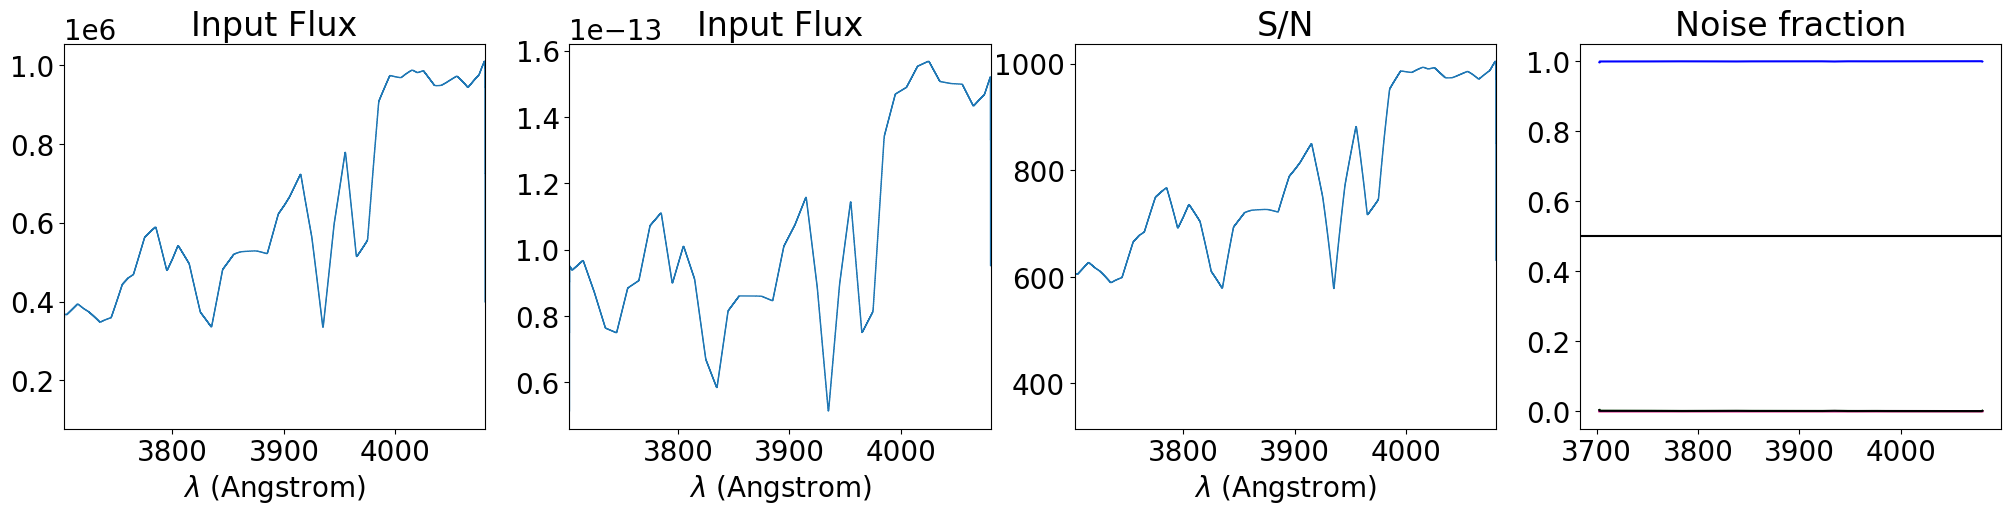

In [21]:

fig,ax = plt.subplots(1,4,figsize=(25,5))
res['spec']['nph_source'].plot(ax=ax[0], title='Input Flux')
res['input']['flux_source'].plot(ax=ax[1], title='Input Flux')
res['spec']['snr'].plot(ax=ax[2], title='S/N')
show_noise(res['spec']['noise'], ax=ax[3])

# our flux is about 20 times fainter, but with we get 3 times higher S/N (?)
# Flux unit?
# S/N measured with respect to different things?

# ima_type='resolved'; spec_type='line' 

In [22]:

def test_snr_from_source():
    mos = etc.giraffe['blue']
    
    wave = 3850 # central wavelength A
    dspec = dict(type='line', lbda=wave, sigma=4.0, skew=7.0)
    spec = etc.get_spec(mos, dspec)
    dima = dict(type='moffat', fwhm=1.0, beta=2.0)
    ima = etc.get_ima(mos, dima, uneven=0)
    
    obs = dict(
        moon = 'darksky',
        airmass = 1,
        ndit = 1, # number of exposures
        dit = 3600, # exposure time in sec of one exposure
        spec_type = 'line',
        spec_range_type = 'fixed',
        spec_range_hsize_spectels = 3,
        ima_type = 'resolved', 
        ima_aperture_type = 'circular_adaptative',
    )
    etc.set_obs(obs)
    flux = 5.e-18
    res0 = etc.snr_from_source(mos, flux, ima, spec)
    kfwhm = etc.optimum_circular_aperture(mos, flux, ima, spec)
    assert kfwhm > 0
    res1 = etc.snr_from_source(mos, flux, ima, spec)
 #   assert res1['aper']['snr'] > res0['aper']['snr']
    
    tab = etc.print_aper(res1, 'res1')
    assert len(tab) > 0
    
    return res0, res1

In [23]:
res0 = test_snr_from_source()[0]
res1 = test_snr_from_source()[1]

res0

{'cube': {'noise': {'ron': 4.0,
   'dark': 0.7071067811865476,
   'sky': <Spectrum(shape=(7,), unit='', dtype='float64')>,
   'source': <Cube(shape=(7, 6, 6), unit='', dtype='float64')>,
   'tot': <Cube(shape=(7, 6, 6), unit='', dtype='float64')>},
  'snr': <Cube(shape=(7, 6, 6), unit='', dtype='float64')>,
  'nph_source': <Cube(shape=(7, 6, 6), unit='', dtype='float64')>,
  'nph_sky': <Spectrum(shape=(7,), unit='', dtype='float64')>,
  'trunc_ima': <Image(shape=(6, 6), unit='', dtype='float64')>,
  'trunc_spec': <Spectrum(shape=(7,), unit='', dtype='float64')>},
 'input': {'flux_source': <Cube(shape=(7, 6, 6), unit='', dtype='float64')>,
  'atm_abs': <Spectrum(shape=(7,), unit='', dtype='>f8')>,
  'ins_trans': <Spectrum(shape=(7,), unit='', dtype='float64')>,
  'atm_emi': <Spectrum(shape=(7,), unit='', dtype='>f8')>,
  'dl': 0.12,
  'flux': 5e-18,
  'moon': 'darksky',
  'dit': 3600,
  'ndit': 1,
  'airmass': 1,
  'spec_type': 'line',
  'ima_type': 'resolved',
  'spec_range_type': 'fix

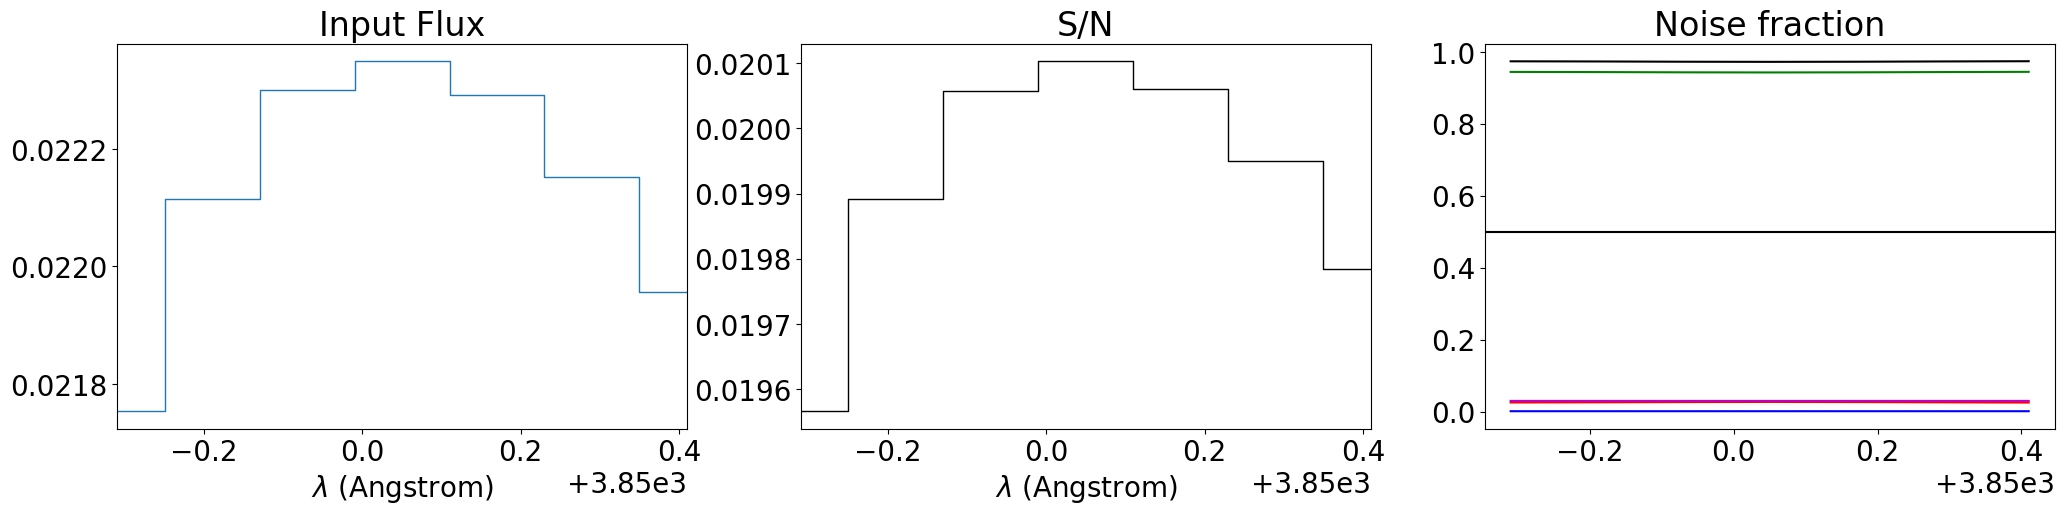

In [25]:

fig,ax = plt.subplots(1,3,figsize=(25,5))
res0['cube']['trunc_spec'].plot(ax=ax[0], title='Input Flux')
res0['spec']['snr'].plot(ax=ax[1], title='S/N', color='k')
show_noise(res0['spec']['noise'], ax=ax[2])

#res1['spec']['snr'].plot(ax=ax[1], title='S/N', color='r', linewidth=4)
#show_noise(res1['spec']['noise'], ax=ax[2])

# ima_type='resolved'; spec_type='cont'

In [26]:
def test_giraffe():
    
    #Is the Flux conversion correct? Object-fiber displacement? Detector bin? ima_beta?
    
    # Comparison with GIRAFFE MOS Medusa
    # Source flux distribution uniform AB=17 Flux=5.843 10**5 W.m-2.microns-1
    # Sky airmass 1 Moon FLI 0
    # Image quality 0.8 arcsec
    # Object-fiber displacement 0, Detector bin 1
    # dit 1800 s nit 1
    # L-inst LR01 362.349 - 408.089  
    # Ref wavelngth 385.7 nm
    # Dispersion 0.012 nm/pixel  Plate scale 0.30 arcsec/pixel
    # FWHM fiber spatial profile 4 pixels
    # at ref wavelength efficiency (no extinction) 1.83% with extinction 1.285% Fiber injection loss 20.832%
    # at ref wavelength total object signal 126.2 e- Sky background 2.2 e- Max intensity 29.7
    # Detect ron 4 e-/pixel dark 0.5 e-/pixel/hour
    # Fiber diameter 6 pixels
    # SN at ref 8.423
    mos = etc.giraffe['blue']
    obs = dict(
        moon = 'greysky',
        airmass = 1.0,
        ndit = 1, 
        dit = 3600, 
        spec_type = 'cont',
        ima_type = 'resolved',
    )
    etc.set_obs(obs)
    
#    ima_fwhm = 0.8 # image moffat fwhm arcsec
#    ima_beta = 4.0 # image moffat beta
#    spec_sigma = 10.0/2.355 # spectral shape sigma in A
#    spec_skew = 0 # spectral shape skewness
    flux = 5.843e5 * 1.e-20 * (1000/1.e4) # en erg/s/cm2/A
#    mag = flux2mag(flux, 0, 5450)[0]   #Need Flux, Flux_Error, Wave (why 5450?). Return Mag[0] and Mag_Error ([1])
#    assert_allclose(mag, 17.0, rtol=0.01)
    
    wave = 3850
    dspec = dict(type='flatcont', wave=[wave-250,wave+250])
    spec = etc.get_spec(mos, dspec)#, oversamp=10) #It builds the source spectrum
    dima = dict(type='moffat', fwhm=0.8, beta=2.5)#, kfwhm=5) #Simulate the observe spectrum in the telescope
    ima = etc.get_ima(mos, dima)#, uneven=0)
    res = etc.snr_from_source(mos, flux, ima, spec)
#    aper = res['spec']
    #assert aper['nb_spaxels'] == 29 # pi*6**2/4 = 28.7 get 32
#    k = aper['snr'].wave.pixel(wave, nearest=True)
#    emi_sky,abs_sky = etc.get_sky(mos, obs['moon'])
#    assert_allclose(mos['instrans'].data[k], 0.0183, 0.1) # 0.0187
#    assert_allclose(mos['instrans'].data[k]*abs_sky.data[k], 0.0129, 0.1) # 0.0124
#    assert_allclose(1-aper['frac_flux'], 0.21, 0.1) # 0.21
    #assert_allclose(aper['snr'].data[k], 8.423, 0.1) # 6.26
    #assert_allclose(aper['nph_source'].data[k], 126.2, 0.1) # 168
    #assert_allclose(aper['nph_sky'].data[k]/aper['nb_spaxels'], 2.2, 0.1) # 0.94
    
    return res

In [27]:
res = test_giraffe()
res

{'cube': {'noise': {'ron': 4.0,
   'dark': 0.7071067811865476,
   'sky': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
   'source': <Cube(shape=(3149, 6, 6), unit='', dtype='float64')>,
   'tot': <Cube(shape=(3149, 6, 6), unit='', dtype='float64')>},
  'snr': <Cube(shape=(3149, 6, 6), unit='', dtype='float64')>,
  'nph_source': <Cube(shape=(3149, 6, 6), unit='', dtype='float64')>,
  'nph_sky': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'trunc_ima': <Image(shape=(6, 6), unit='', dtype='float64')>,
  'trunc_spec': <Spectrum(shape=(3149,), unit='', dtype='float64')>},
 'input': {'flux_source': <Cube(shape=(3149, 6, 6), unit='', dtype='float64')>,
  'atm_abs': <Spectrum(shape=(3149,), unit='', dtype='>f8')>,
  'ins_trans': <Spectrum(shape=(3149,), unit='', dtype='float64')>,
  'atm_emi': <Spectrum(shape=(3149,), unit='', dtype='>f8')>,
  'dl': 0.12,
  'flux': 5.843e-16,
  'moon': 'greysky',
  'dit': 3600,
  'ndit': 1,
  'airmass': 1.0,
  'spec_type': 'cont',
  'ima_type'

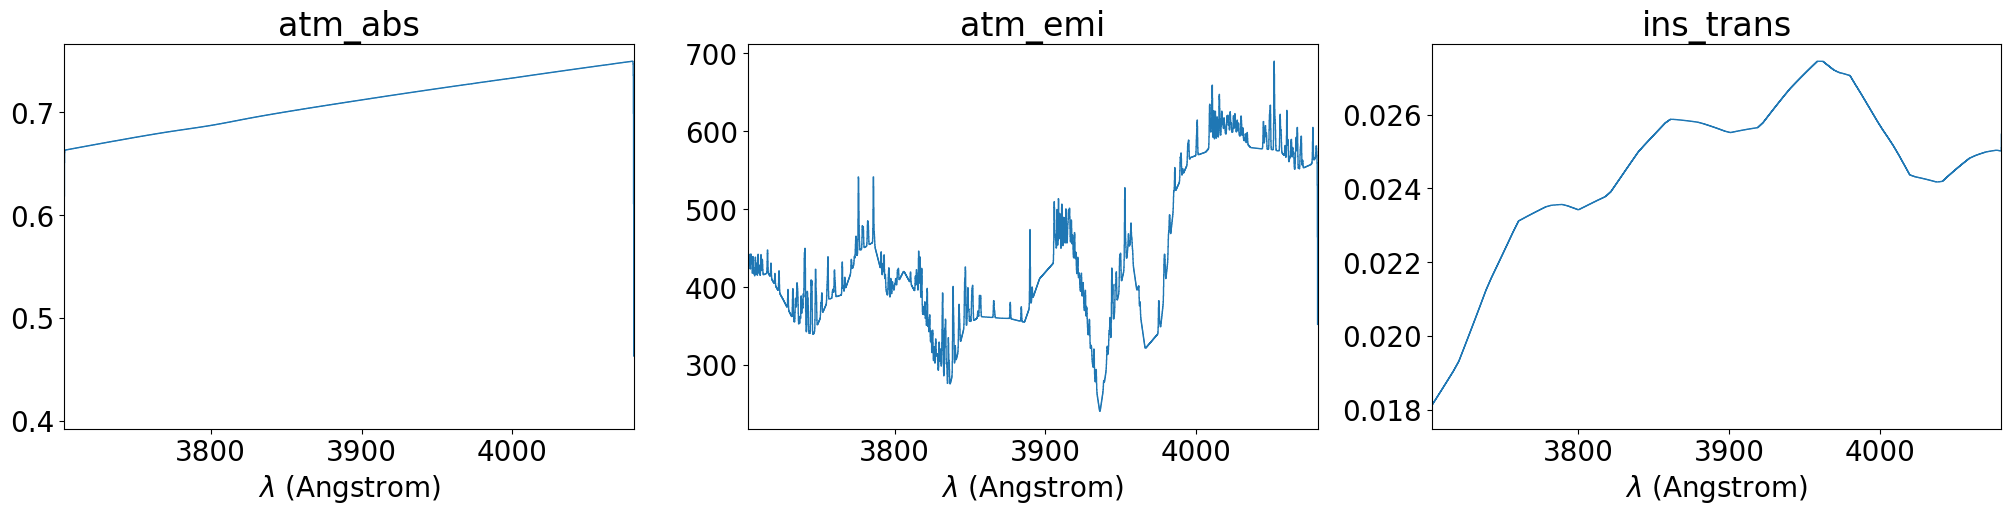

In [28]:
#test_giraffe().plot()            #For spec
#test_giraffe().plot(zscale=True) #For ima

r = test_giraffe()['input']
r
fig,ax = plt.subplots(1,3,figsize=(25,5))
r['atm_abs'].plot(ax=ax[0], title='atm_abs')
r['atm_emi'].plot(ax=ax[1], title='atm_emi')  
r['ins_trans'].plot(ax=ax[2], title='ins_trans')


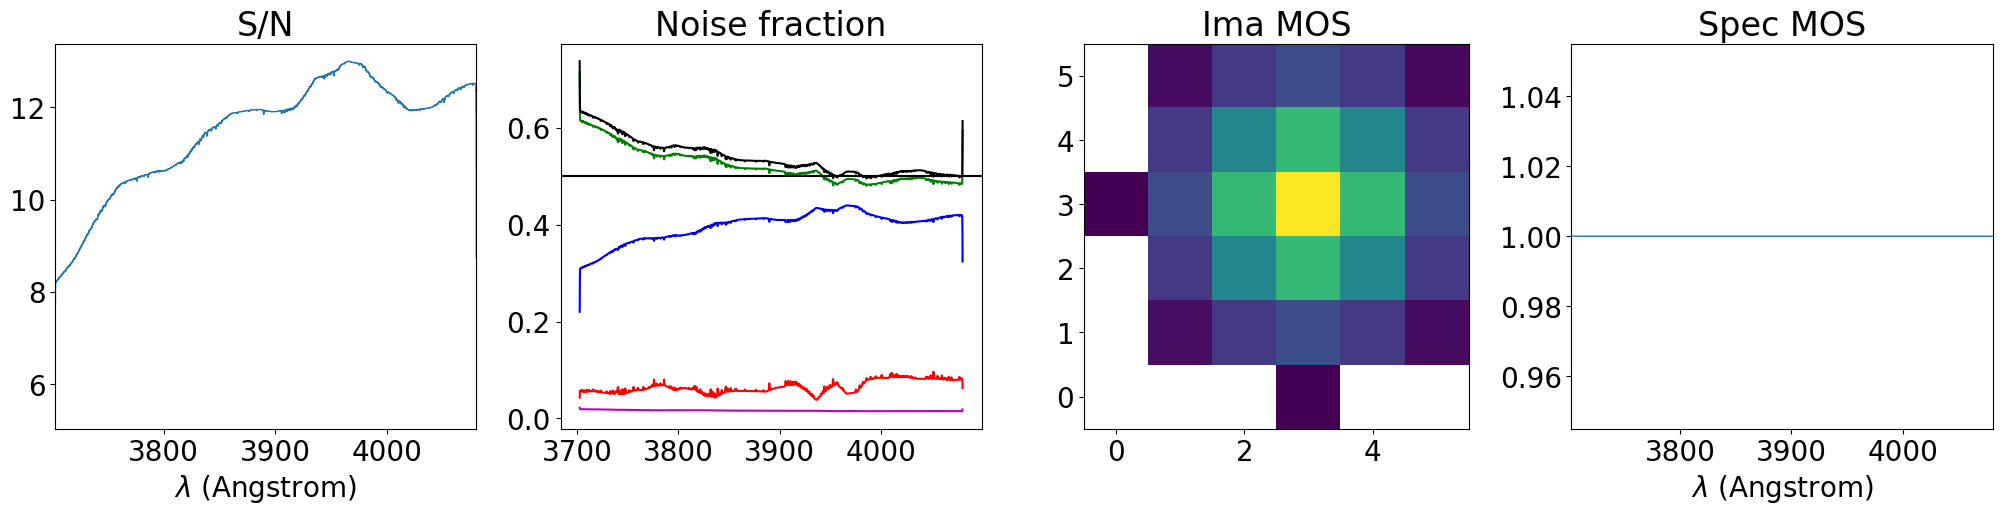

In [29]:

fig,ax = plt.subplots(1,4,figsize=(25,5))
res['spec']['snr'].plot(ax=ax[0], title='S/N')
show_noise(res['spec']['noise'], ax=ax[1])
res['cube']['trunc_ima'].plot(ax=ax[2], title='Ima MOS')
res['cube']['trunc_spec'].plot(ax=ax[3], title='Spec MOS')


# ima_type='sb'; spec_type='cont'

In [12]:
def test_flatcont():
    
    """
    
    The surface brightness type is defined by a spectrum. For this case the spectrum is 'cont' (constant flux),
    which should by described in the 'dspec' dictionary. As result we get a MPDAF spectrum normalised to 1.
    
    """
    
    mos = etc.giraffe['blue']
   
    # -------------------------------------
    obs = dict(
        moon = 'greysky',
        airmass = 1.0,
        ndit = 1, 
        dit = 3600, 
        spec_type = 'cont',
        ima_type = 'sb', 
#        ima_area = 1.0 # arcsec**2 only of IFS. For MOS is the fiber aperture!
    )
    wave = 3850
    dspec = dict(type='flatcont', wave=[wave-250,wave+250])
    spec = etc.get_spec(mos, dspec)
    mag = 20
    flux = mag2flux(mag, wave)
    etc.set_obs(obs)
    res = etc.snr_from_source(mos, flux, None, spec)
    res1 = etc.snr_from_source(mos, flux, None, spec)
    sp = res['spec']
    assert sp['snr'].data.min() > 0
    k = sp['snr'].wave.pixel(wave, nearest=True)
    wrange = [wave-250,wave+250]
    krange = sp['snr'].wave.pixel(wrange, nearest=True)
    snr0 = np.mean(sp['snr'].data[krange[0]:krange[1]])
    res = etc.flux_from_source(mos, snr0, None, spec, snrcomp=dict(method='mean',waves=wrange))
    mag = flux2mag(res['spec']['flux'], 0, wave)[0]
    assert_allclose(res['spec']['snr_med'], snr0, rtol=0.01) 
    assert_allclose(mag, 20.0, rtol=0.01) 
    
    return sp, res1

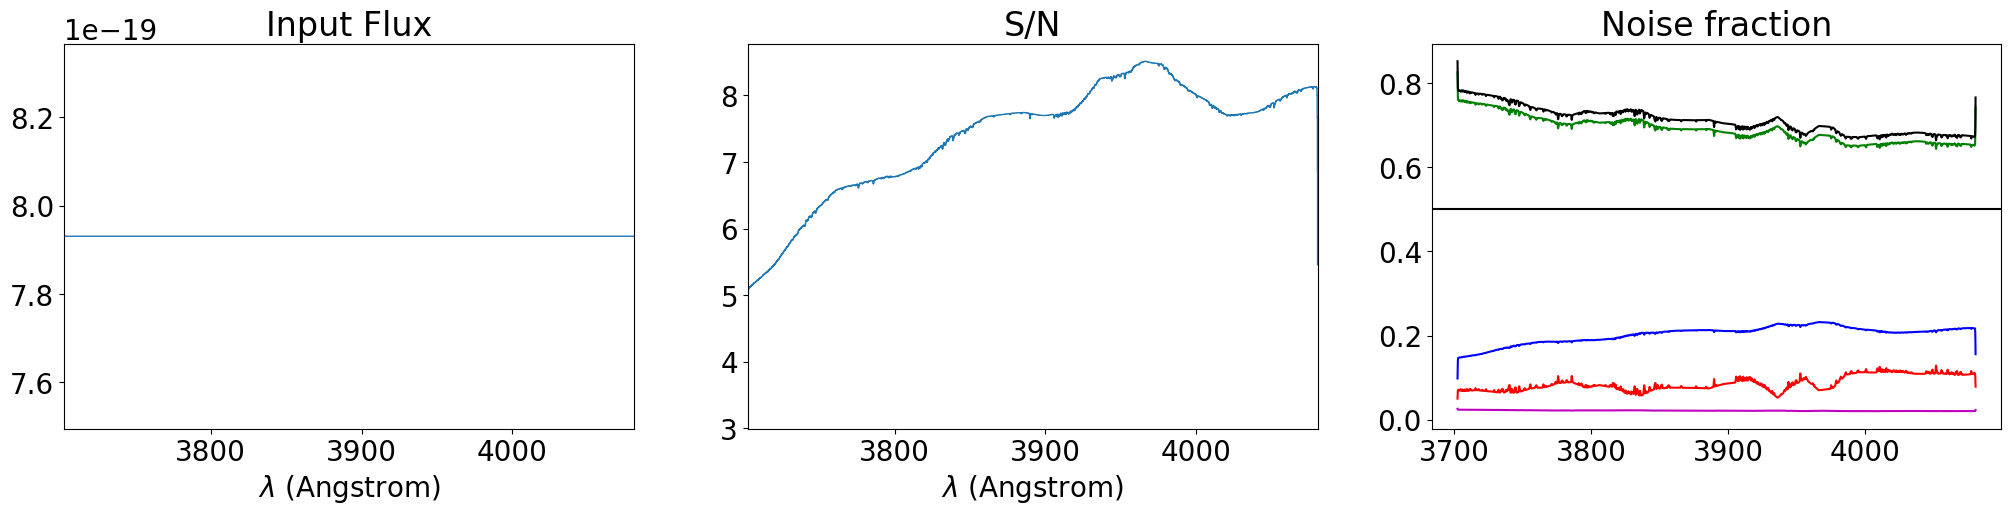

In [13]:
# our flux is about 2000 times fainter, but with we get 10 times higher S/N (?)
# Flux unit?
# S/N measured with respect to different things?

res = test_flatcont()[1]

fig,ax = plt.subplots(1,3,figsize=(25,5))
res['input']['flux_source'].plot(ax=ax[0], title='Input Flux')
res['spec']['snr'].plot(ax=ax[1], title='S/N')
show_noise(res['spec']['noise'], ax=ax[2])

# ima_type='sb'; spec_type='line'

In [30]:
def test_line():
    
    """

    The surface brightness type is defined by a spectrum. For this case the spectrum is 'line' (emission line),
    which should by described in the 'dspec' dictionary. Additional parameters are need for emission lines:
    'sigma' and 'skew'. A Gaussian as 'skew'=0.
       
    """
    
    mos = etc.giraffe['blue']
    
    obs = dict(
        moon = 'greysky',
        airmass = 1.0,
        ndit = 1, 
        dit = 3600, 
        spec_type = 'line',
        spec_range_type = 'adaptative',
        spec_range_kfwhm = 3,    
        ima_type = 'sb', 
    )
    wave = 3850
    dspec = dict(type='line', lbda=wave, sigma=4.0, skew=7.0)
    spec = etc.get_spec(mos, dspec) #optional parameters: 'oversamp' and 'lsfconv'
    flux = 5.e-18
    etc.set_obs(obs)
    res = etc.snr_from_source(mos, flux, None, spec)
    sp = res['spec']
    assert sp['snr_mean'] > 0
    
    return res

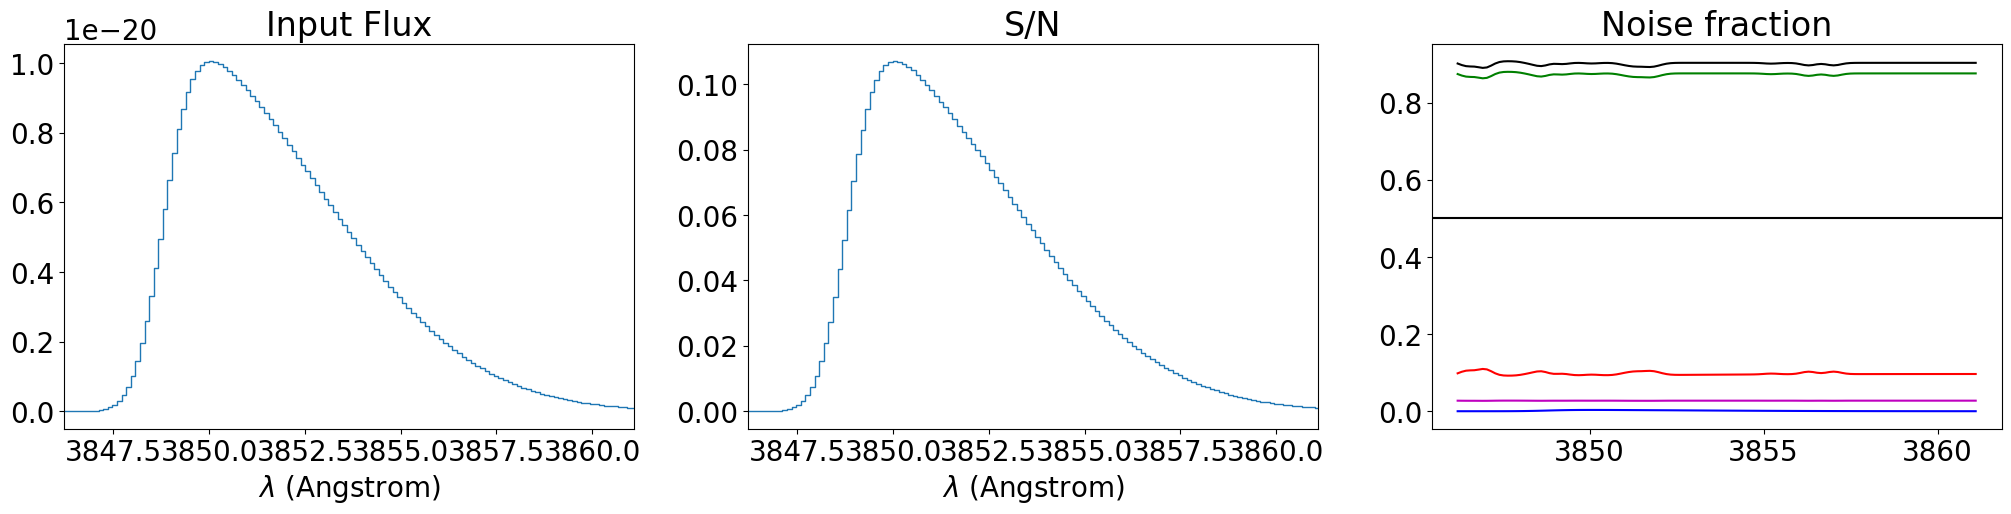

In [31]:
res = test_line()

fig,ax = plt.subplots(1,3,figsize=(25,5))
res['input']['flux_source'].plot(ax=ax[0], title='Input Flux')
res['spec']['snr'].plot(ax=ax[1], title='S/N')
show_noise(res['spec']['noise'], ax=ax[2])

# ima_type='sb'; spect_type='template'

In [32]:
def test_sb_temp():
    
    """

    The surface brightness type is defined by a spectrum. For this case the spectrum is 'template',
    which should by described in the 'dspec' dictionary.
       
    """
    
    mos = etc.giraffe['blue']
    
    obs = dict(
        moon = 'greysky',
        airmass = 1.0,
        ndit = 1, 
        dit = 3600, 
        spec_type = 'cont', #It doesn't work for 'template'
        ima_type = 'sb', 
    )
    wave  = 3850
    dspec = dict(type='template', name='kc96/starb1',redshift=0.5, wave_center=wave, wave_width=250)
    spec  = etc.get_spec(mos, dspec) #optional parameters: 'oversamp' and 'lsfconv'
    mag   = 20
    flux  = mag2flux(mag, wave) #5.e-18
    etc.set_obs(obs)
    res   = etc.snr_from_source(mos, flux, ima=None, spec=spec)
    sp    = res['spec']
    assert sp['snr_mean'] > 0
    
    return res

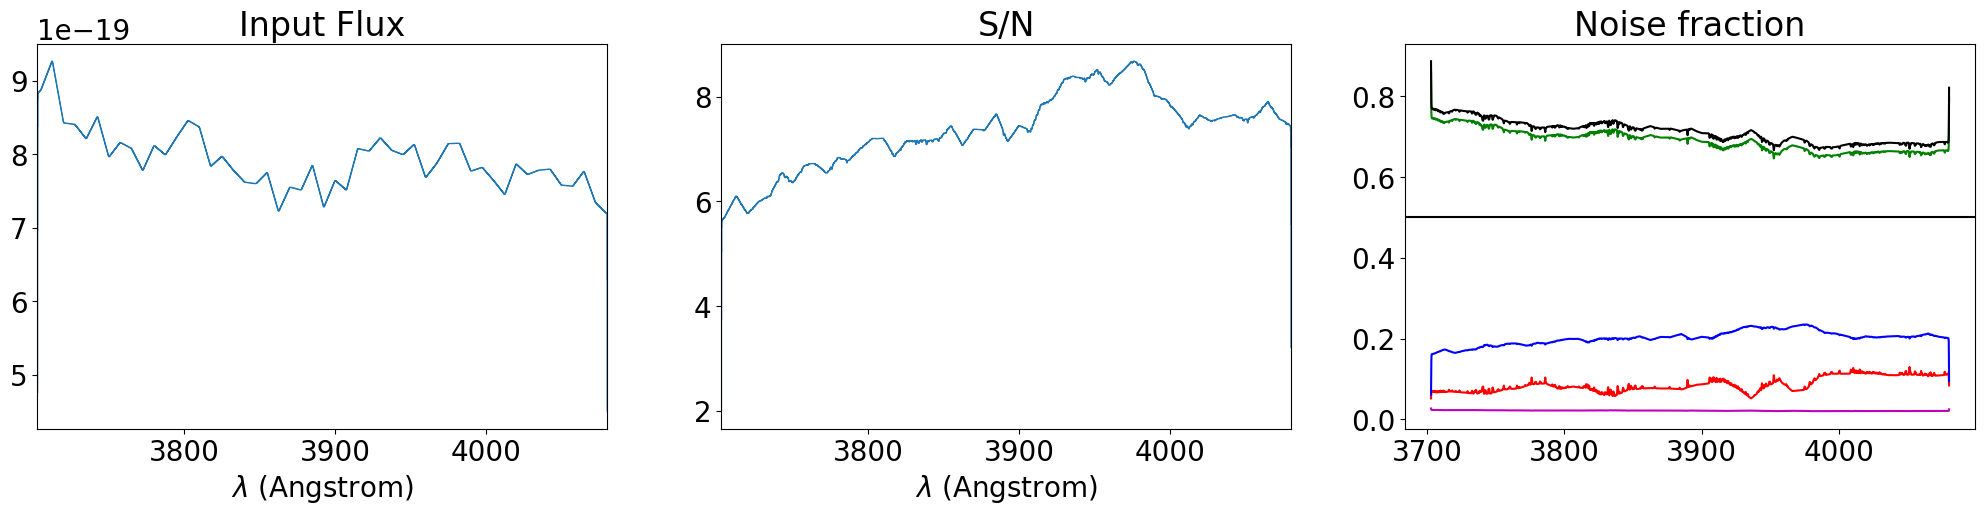

In [33]:
res = test_sb_temp()

fig,ax = plt.subplots(1,3,figsize=(25,5))
res['input']['flux_source'].plot(ax=ax[0], title='Input Flux')
res['spec']['snr'].plot(ax=ax[1], title='S/N')
show_noise(res['spec']['noise'], ax=ax[2])


# Apparently, it is not defined in the code for spec_type='template'